In [ ]:
!pip install tensorflow scikit-learn matplotlib shap lime numpy pandas

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
print("Loading the dataset...\n")
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Target: species (0 = setosa, 1 = versicolor, 2 = virginica)
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Feature names: {iris.feature_names}")
print(f"Target names: {iris.target_names}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")
print("\nBuilding the ANN Model...")
ann_model = keras.Sequential([
    layers.Input(shape=(4,), name='input_layer'),
    layers.Dense(8, activation='relu', name='hidden_layer_1'),
    layers.Dense(6, activation='relu', name='hidden_layer_2'),
    layers.Dense(3, activation='softmax', name='output_layer')])
print("\nANN Model Architecture:")
ann_model.summary()
ann_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
print("\nTraining ANN Model...")
ann_history = ann_model.fit(
    X_train_scaled, y_train,
    epochs=80, batch_size=16, validation_split=0.2, verbose=1) 
print("\nEvaluating ANN Model...")
ann_test_loss, ann_test_accuracy = ann_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"ANN Test Accuracy: {ann_test_accuracy:.4f}")
ann_predictions = ann_model.predict(X_test_scaled)
ann_predicted_classes = np.argmax(ann_predictions, axis=1)
print(f"First 5 predictions: {ann_predicted_classes[:5]}")
print(f"First 5 actual labels: {y_test[:5]}")

Loading the dataset...

Dataset shape: (150, 4)
Number of classes: 3
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Training set shape: (120, 4)
Test set shape: (30, 4)

Building the ANN Model...

ANN Model Architecture:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115 (460.00 B)

 Trainable params: 115 (460.00 B)

 Non-trainable params: 0 (0.00 B)


Training ANN Model...
Epoch 1/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2871 - loss: 1.1793 - val_accuracy: 0.2917 - val_loss: 1.1618
Epoch 2/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3338 - loss: 1.1455 - val_accuracy: 0.2917 - val_loss: 1.1410
Epoch 3/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3193 - loss: 1.1425 - val_accuracy: 0.2917 - val_loss: 1.1201
Epoch 4/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3412 - loss: 1.1137 - val_accuracy: 0.2917 - val_loss: 1.1027
Epoch 5/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3293 - loss: 1.0998 - val_accuracy: 0.2917 - val_loss: 1.0849
Epoch 6/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3588 - loss: 1.0935 - val_accuracy: 0.2917 - val_loss: 1.0697
Epoch 7/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3414 - loss: 1.0728 - val_accuracy: 0.2917 - val_loss: 1.0535
Epoch 8/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3140 - loss: 1.0661 - val_accuracy: 0.2917 - v

Part 1: SHAP Analysis:

Global Feature Importance Visualizations:


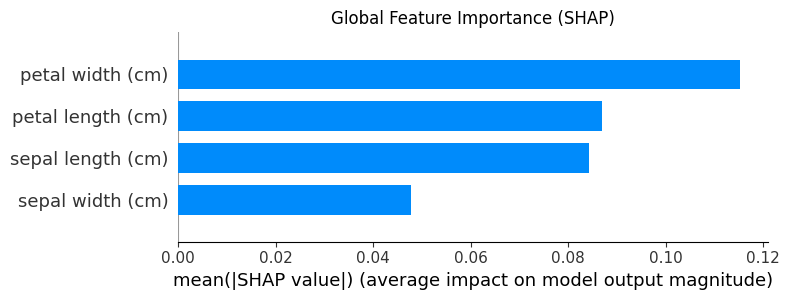

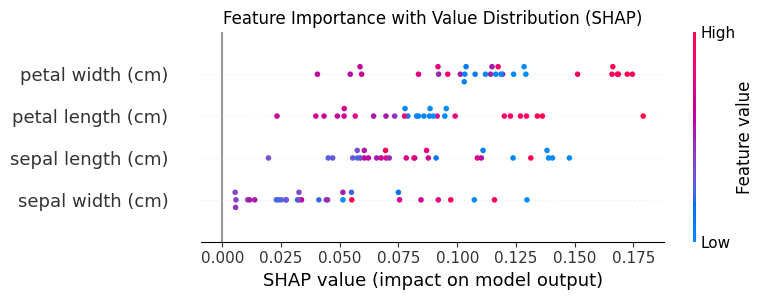


Class-Specific SHAP Analysis:


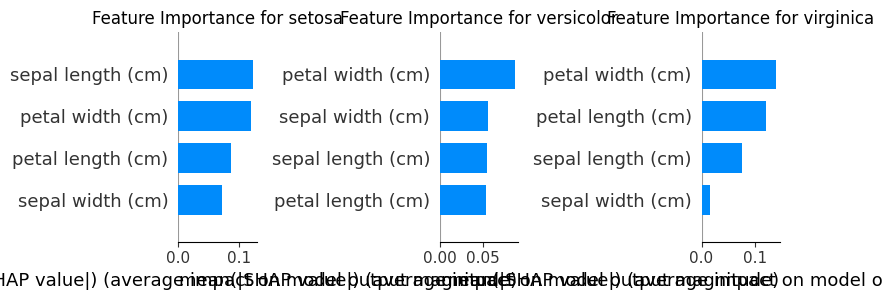


Feature Dependence Analysis:


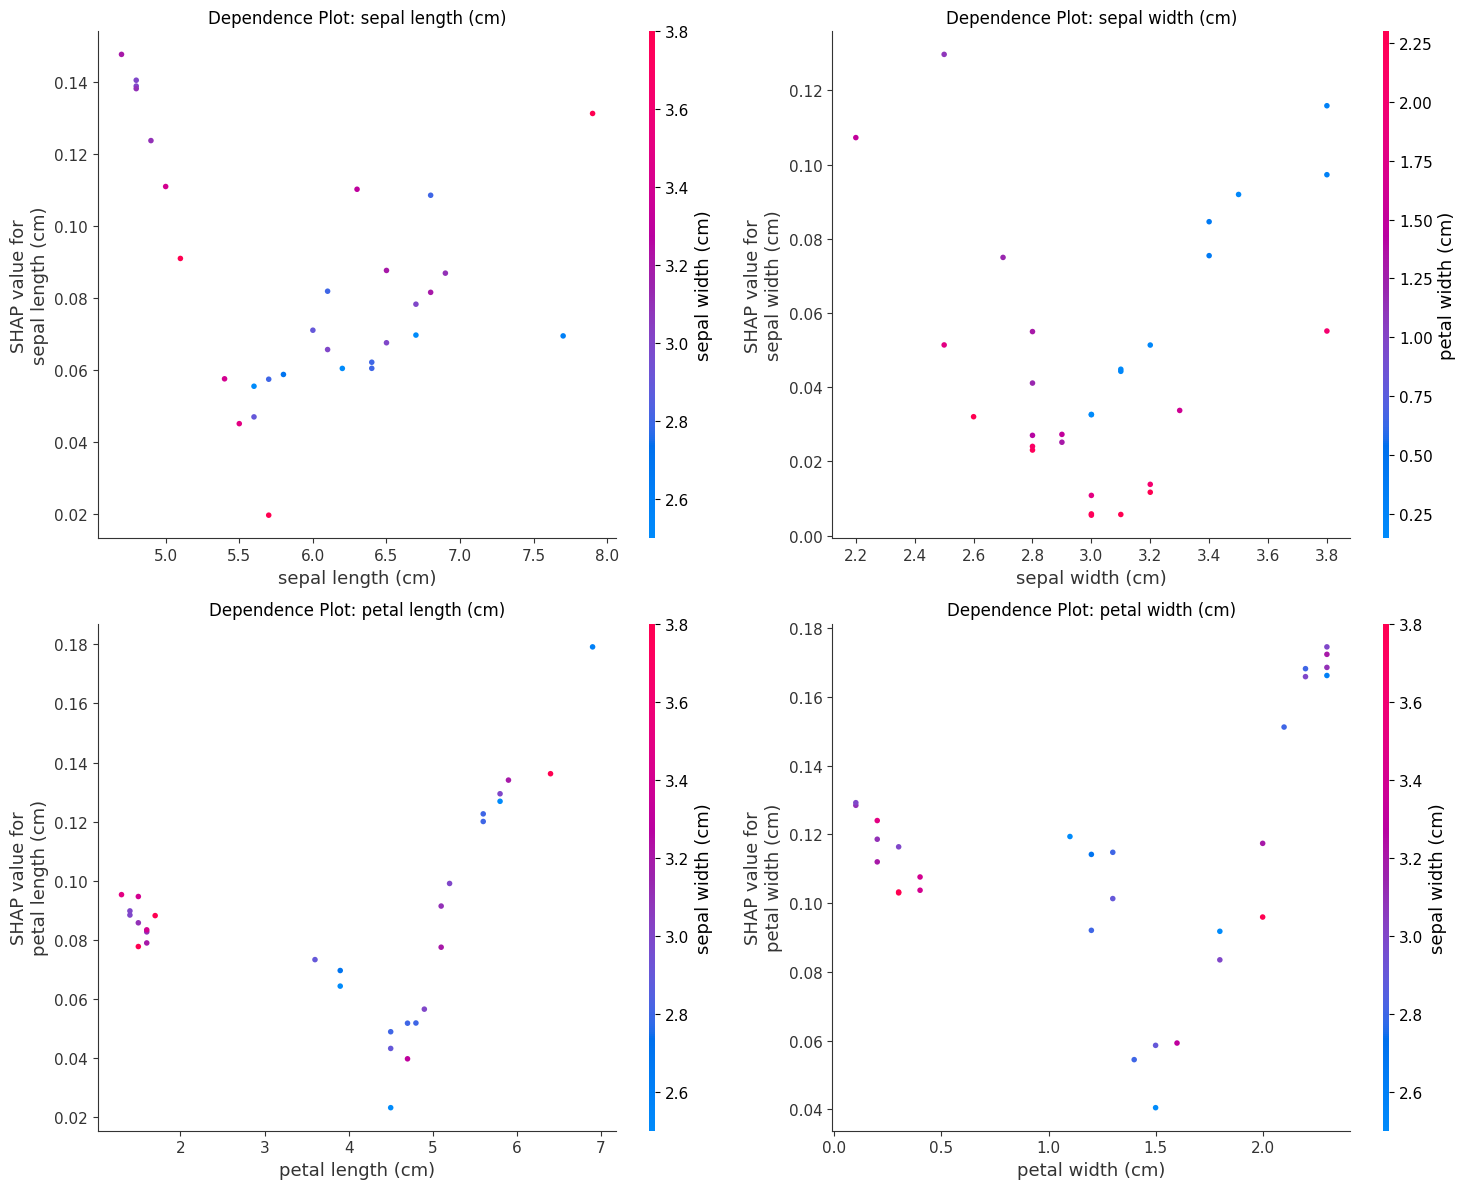


Feature Interaction Analysis:


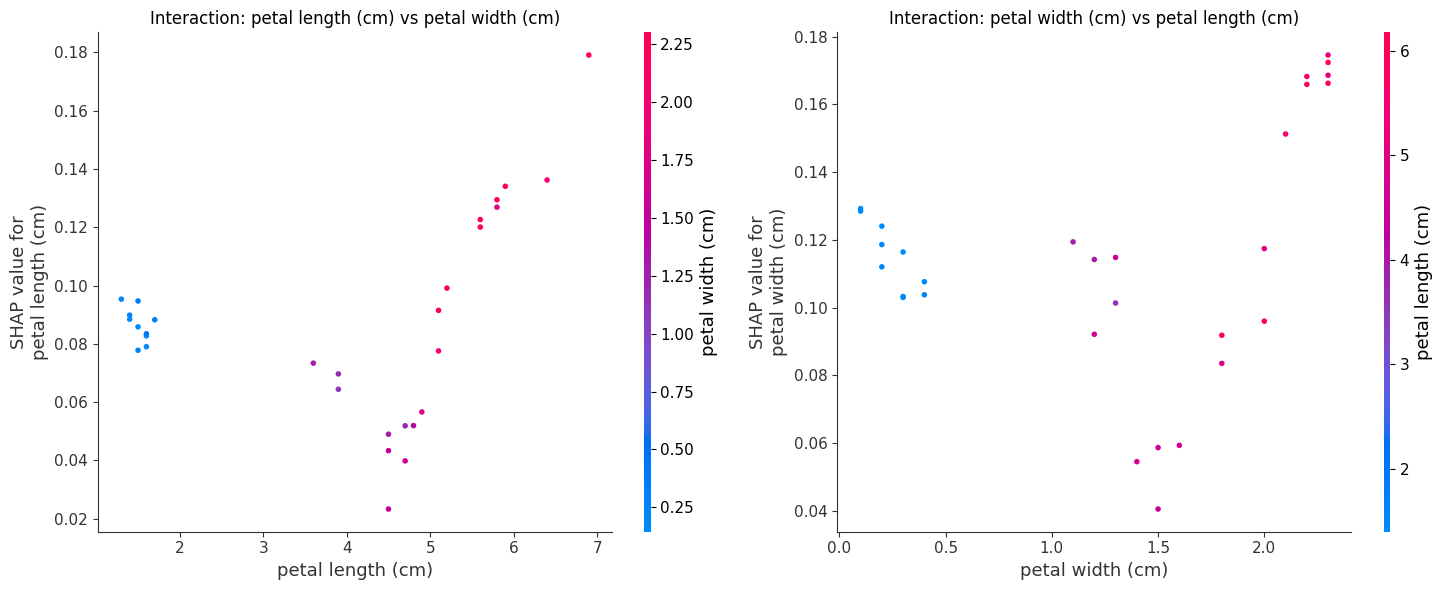


Individual Prediction Analysis (Waterfall Plots):
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


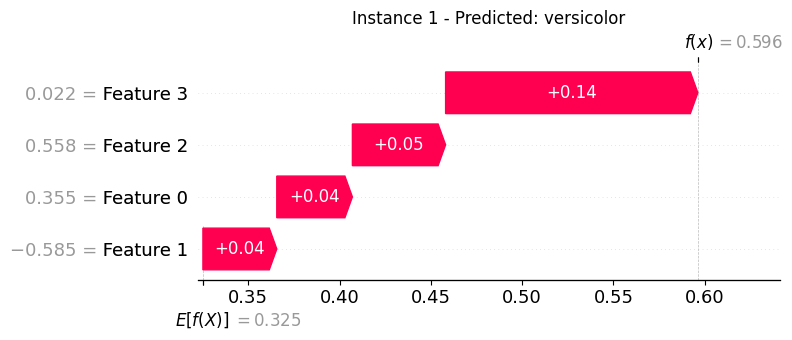

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


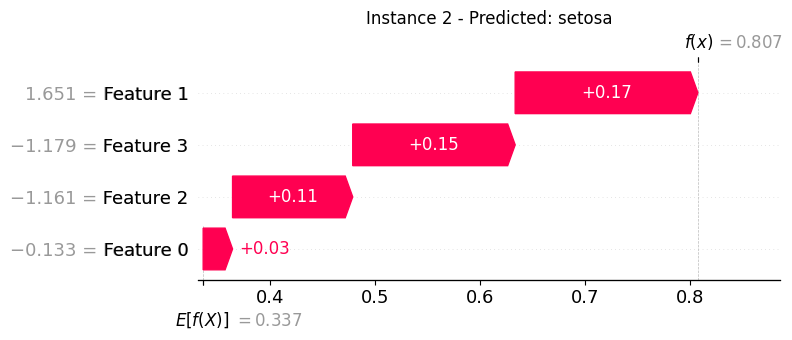

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


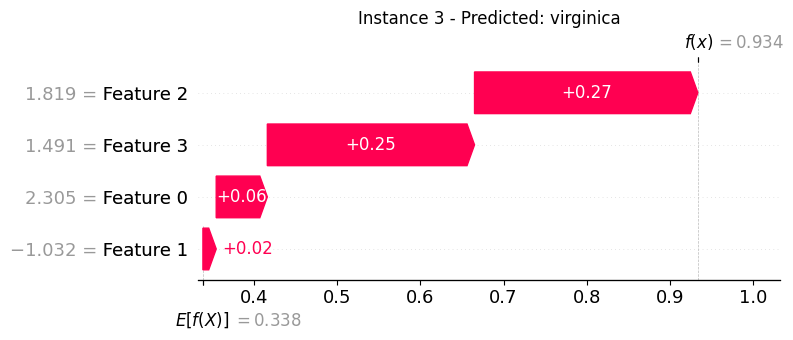


Force Plots for Multiple Instances:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


<Figure size 1200x300 with 0 Axes>

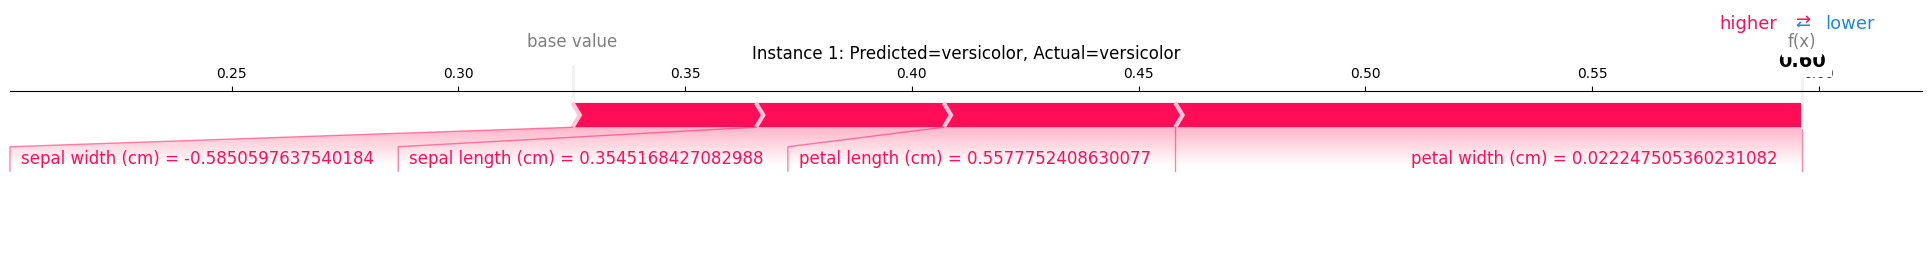

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


<Figure size 1200x300 with 0 Axes>

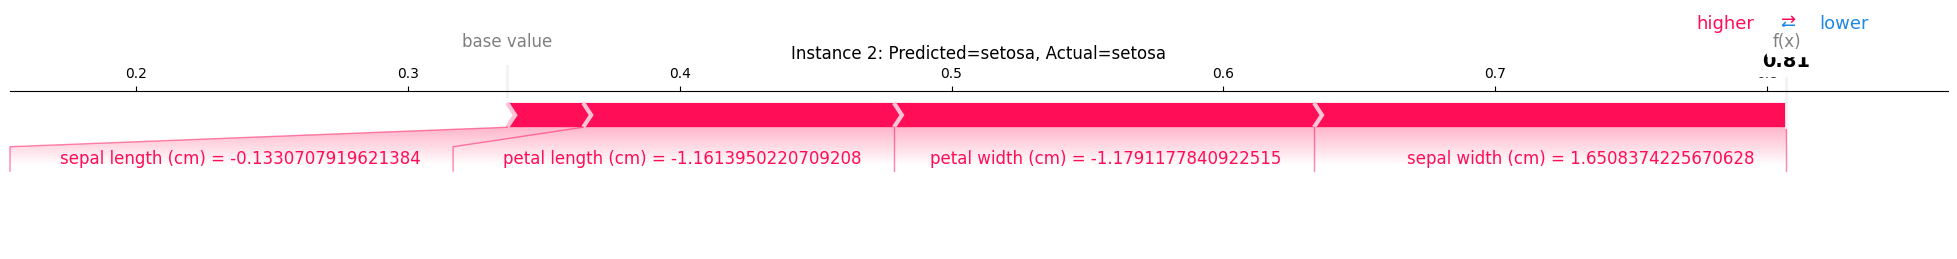

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


<Figure size 1200x300 with 0 Axes>

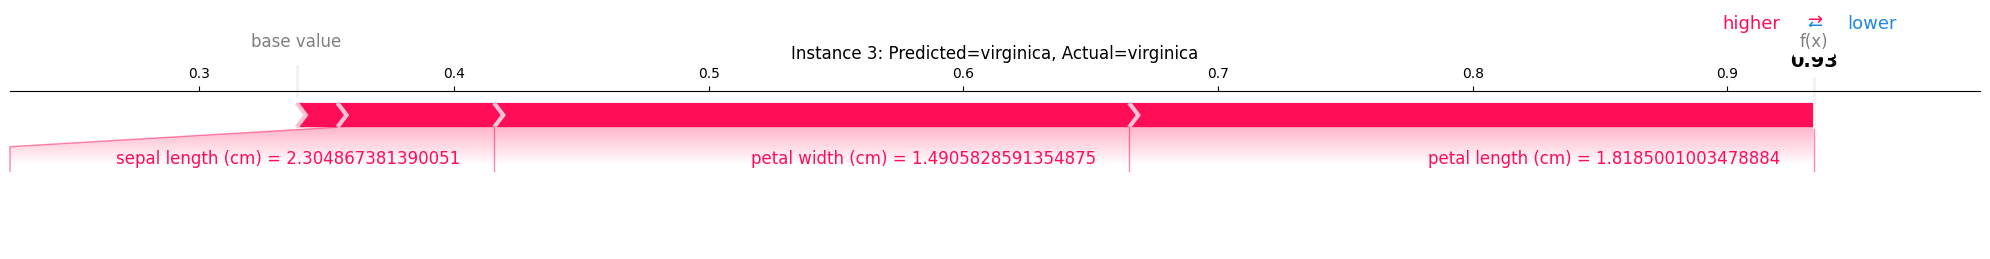

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


<Figure size 1200x300 with 0 Axes>

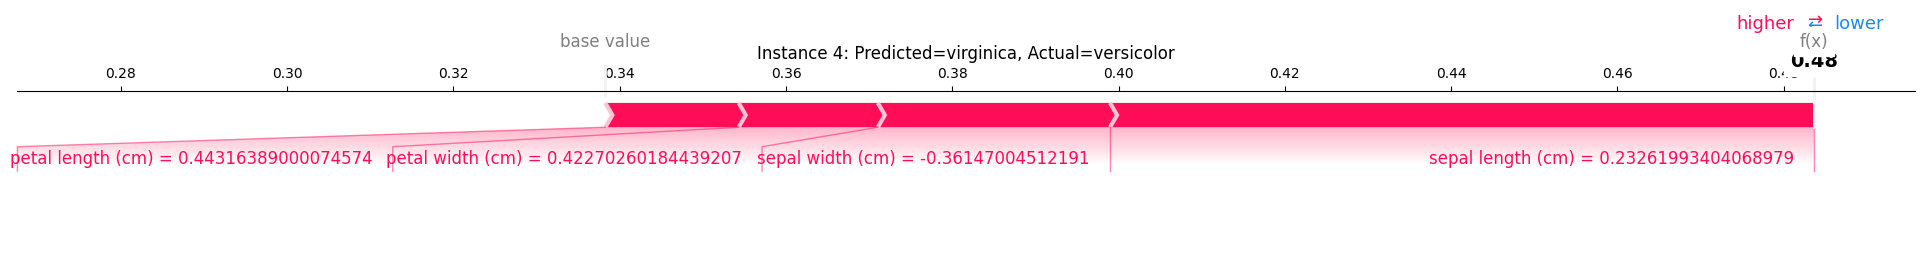

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


<Figure size 1200x300 with 0 Axes>

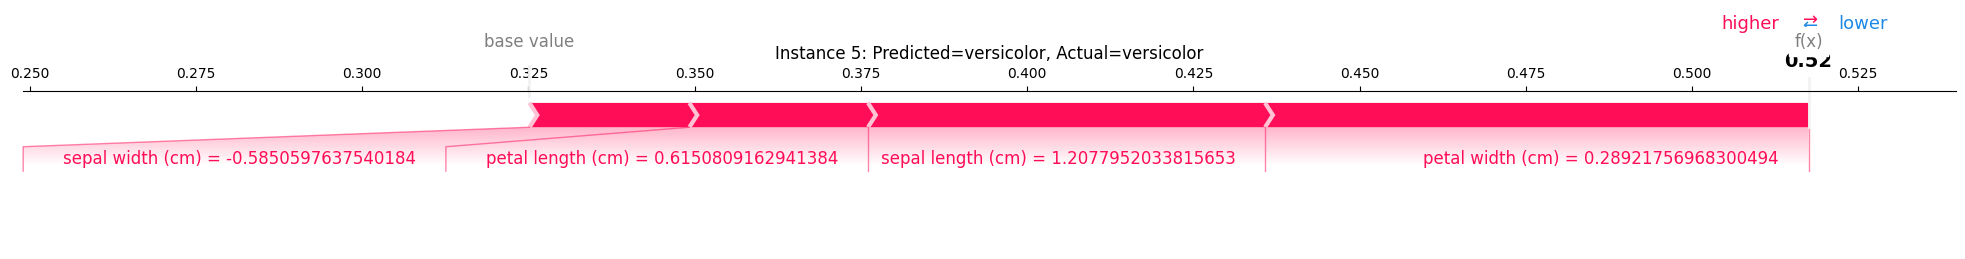


Decision Plot (Prediction Paths):


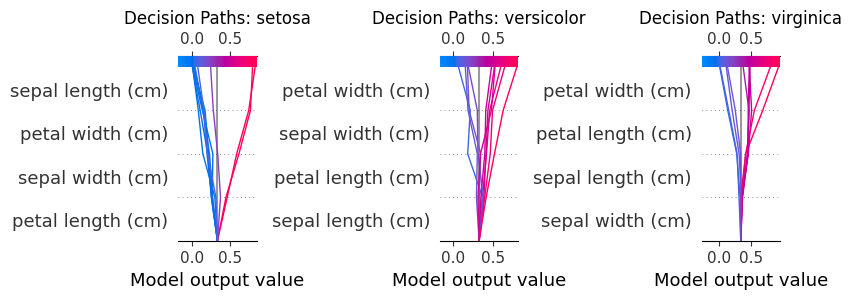


Part 2: LIME Analysis:


Individual Instance Explanations:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Instance 1:
Actual class: versicolor
Predicted class: versicolor
Prediction confidence: 0.596
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step


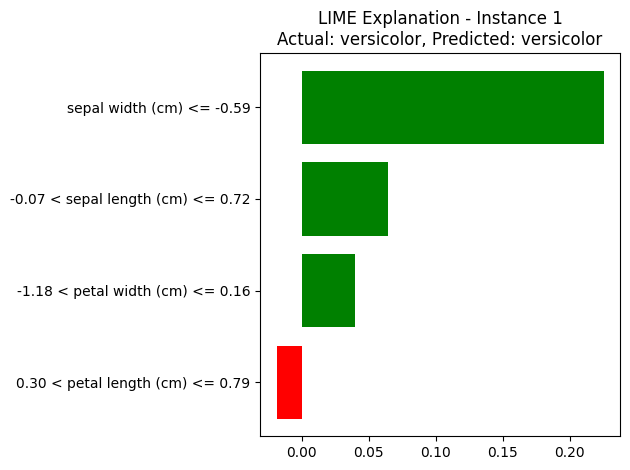

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Instance 2:
Actual class: setosa
Predicted class: setosa
Prediction confidence: 0.807
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step


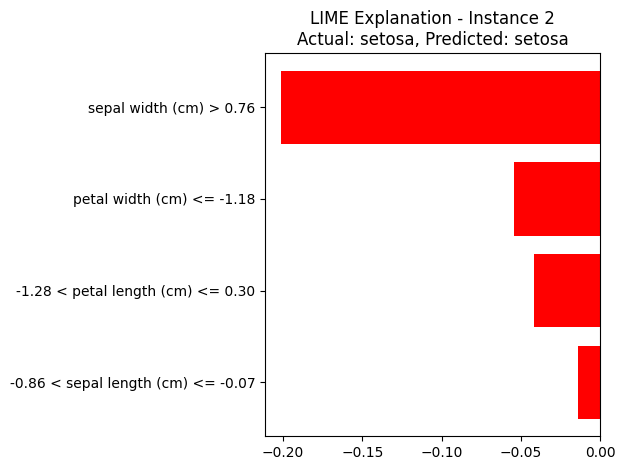

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

Instance 3:
Actual class: virginica
Predicted class: virginica
Prediction confidence: 0.934
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step


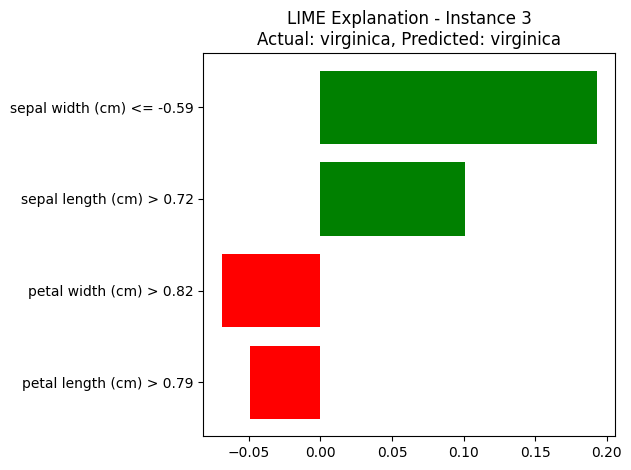

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Instance 4:
Actual class: versicolor
Predicted class: virginica
Prediction confidence: 0.484
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step


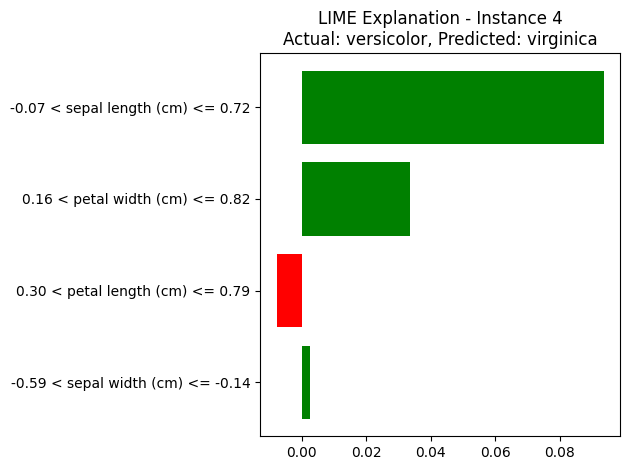

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Instance 5:
Actual class: versicolor
Predicted class: versicolor
Prediction confidence: 0.518
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step


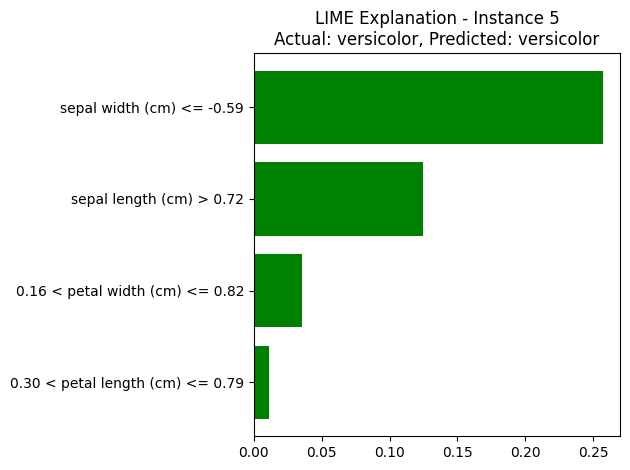


LIME Stability Analysis:
Running LIME 5 times on the same instance to check stability...
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step


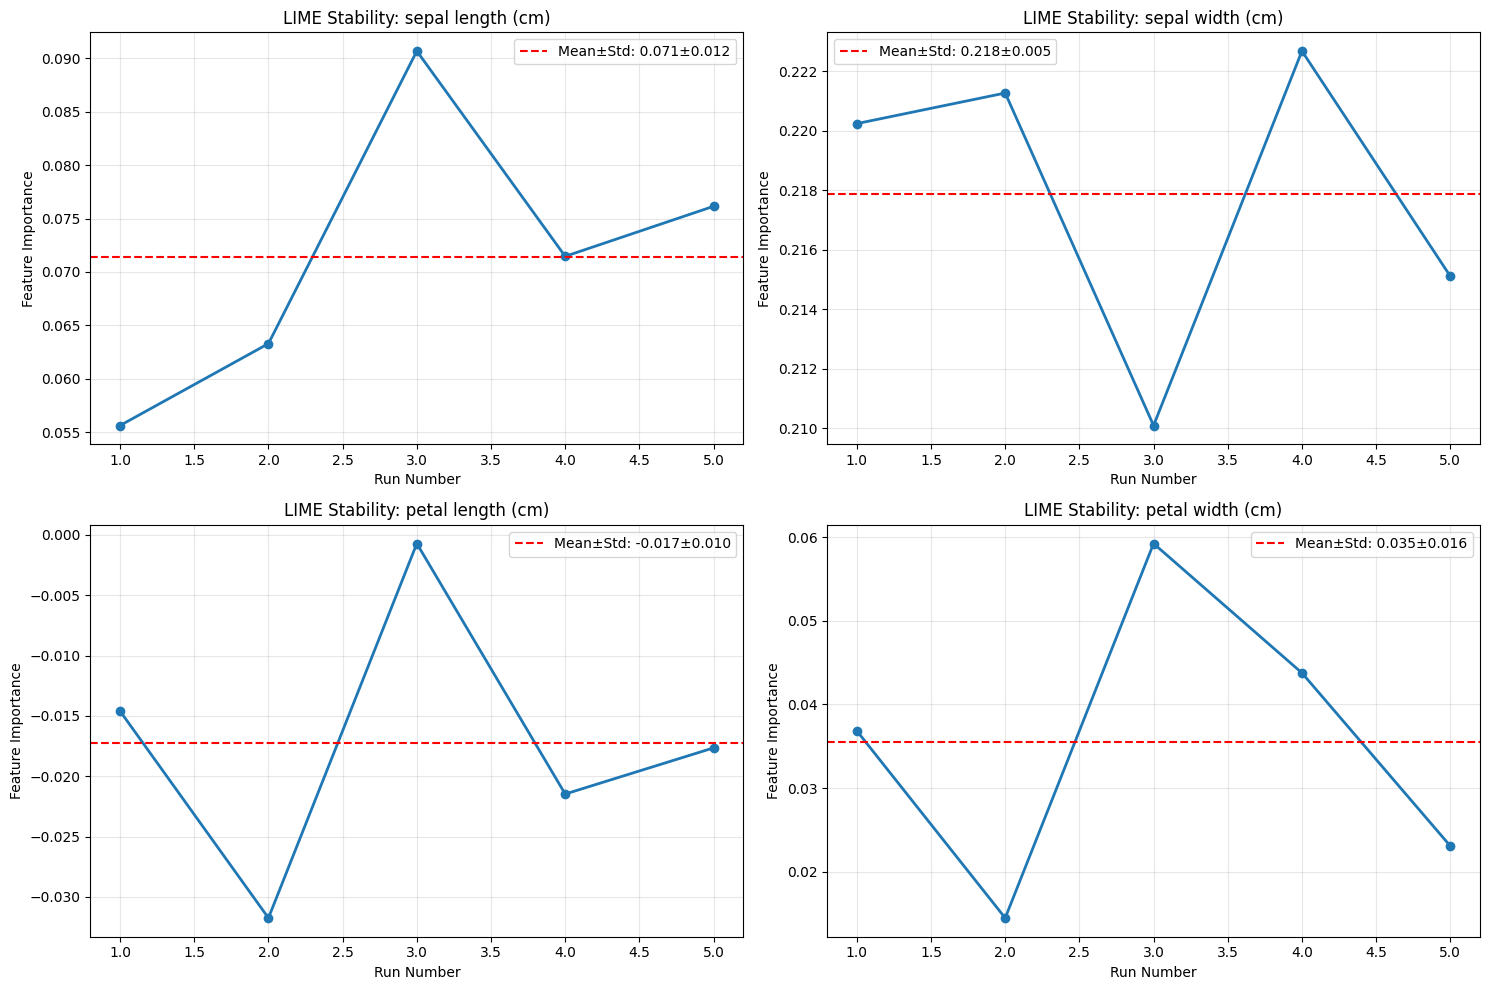


LIME vs SHAP Comparison:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


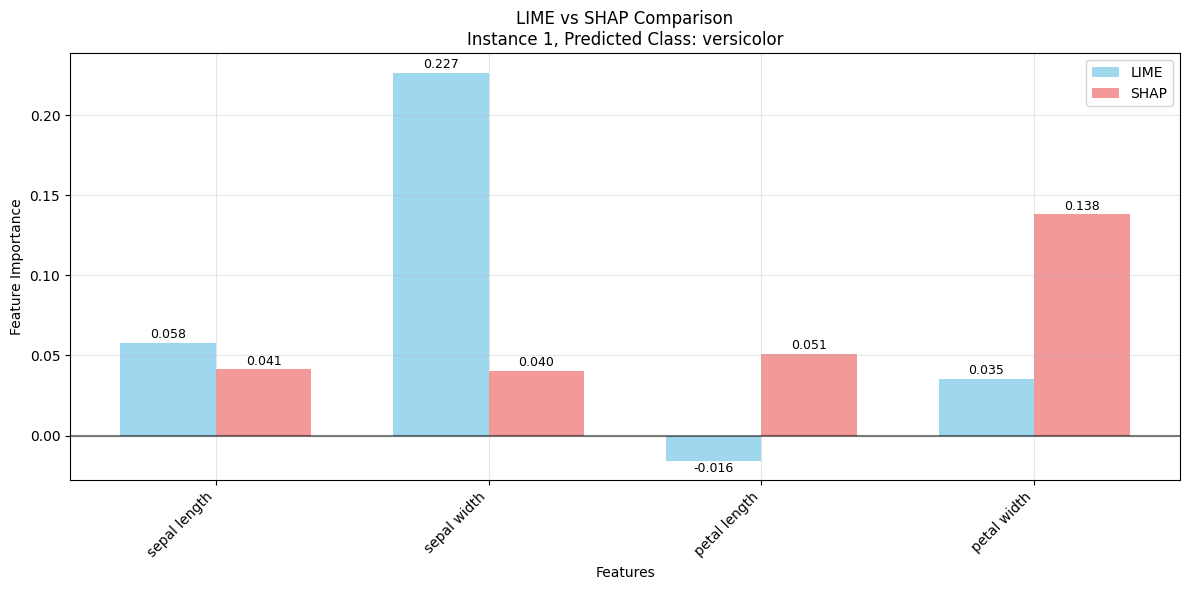


XAI Analysis has been completed.


In [7]:
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
print("Part 1: SHAP Analysis:\n")
explainer = shap.Explainer(ann_model, X_train_scaled)
shap_values = explainer(X_test_scaled)
vals = shap_values.values
vals_global = np.mean(np.abs(vals), axis=2)
print("Global Feature Importance Visualizations:")
plt.figure(figsize=(10, 6))
shap.summary_plot(vals_global, features=X_test_scaled, feature_names=iris.feature_names, plot_type="bar", show=False)
plt.title("Global Feature Importance (SHAP)")
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
shap.summary_plot(vals_global, features=X_test_scaled, feature_names=iris.feature_names, show=False)
plt.title("Feature Importance with Value Distribution (SHAP)")
plt.tight_layout()
plt.show()
print("\nClass-Specific SHAP Analysis:")
class_names = iris.target_names
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for class_idx, class_name in enumerate(class_names):
    plt.sca(axes[class_idx])
    shap.summary_plot(vals[:, :, class_idx], features=X_test_scaled, feature_names=iris.feature_names, show=False, plot_type="bar")
    plt.title(f"Feature Importance for {class_name}")
plt.tight_layout()
plt.show()
print("\nFeature Dependence Analysis:")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()
for i, feature_name in enumerate(iris.feature_names):
    plt.sca(axes[i])
    try:
        shap.dependence_plot(i, vals_global, X_test, feature_names=iris.feature_names, show=False, ax=axes[i])
        axes[i].set_title(f"Dependence Plot: {feature_name}")
    except Exception as e:
        print(f"SHAP dependence plot failed for {feature_name}, creating manual plot...")
        feature_values = X_test[:, i]  
        shap_values_feature = vals_global[:, i] 
        axes[i].scatter(feature_values, shap_values_feature, alpha=0.6)
        axes[i].set_xlabel(f"{feature_name}")
        axes[i].set_ylabel(f"SHAP value for {feature_name}")
        axes[i].set_title(f"Dependence Plot: {feature_name}")
        axes[i].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print("\nFeature Interaction Analysis:")
feature_importance = vals_global.mean(axis=0)
top_2_features = np.argsort(feature_importance)[-2:]
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
interaction_pairs = [(top_2_features[0], top_2_features[1]), (top_2_features[1], top_2_features[0])]
for i, (feat1, feat2) in enumerate(interaction_pairs):
    plt.sca(axes[i])
    try:
        shap.dependence_plot(feat1, vals_global, X_test, interaction_index=feat2,
                            feature_names=iris.feature_names, show=False, ax=axes[i])
        axes[i].set_title(f"Interaction: {iris.feature_names[feat1]} vs {iris.feature_names[feat2]}")
    except Exception as e:
        print(f"Interaction plot failed, creating simplified version...")
        feature1_vals = X_test[:, feat1]
        shap_vals = vals_global[:, feat1]
        feature2_vals = X_test[:, feat2]
        scatter = axes[i].scatter(feature1_vals, shap_vals, c=feature2_vals, alpha=0.6, cmap='viridis')
        axes[i].set_xlabel(f"{iris.feature_names[feat1]}")
        axes[i].set_ylabel(f"SHAP value for {iris.feature_names[feat1]}")
        axes[i].set_title(f"Interaction: {iris.feature_names[feat1]} vs {iris.feature_names[feat2]}")
        plt.colorbar(scatter, ax=axes[i], label=iris.feature_names[feat2])
        axes[i].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print("\nIndividual Prediction Analysis (Waterfall Plots):")
for i in range(3):
    predicted_class = np.argmax(ann_model.predict(X_test_scaled[i:i+1]))
    plt.figure(figsize=(10, 6))
    shap.waterfall_plot(shap_values[i, :, predicted_class], max_display=4, show=False)
    plt.title(f"Instance {i+1} - Predicted: {iris.target_names[predicted_class]}")
    plt.tight_layout()
    plt.show()
print("\nForce Plots for Multiple Instances:")
for i in range(min(5, len(X_test_scaled))):
    predicted_class = np.argmax(ann_model.predict(X_test_scaled[i:i+1]))
    actual_class = y_test[i]
    plt.figure(figsize=(12, 3))
    shap.force_plot(shap_values.base_values[i, predicted_class],
                   vals[i, :, predicted_class], X_test_scaled[i],
                   feature_names=iris.feature_names, matplotlib=True, show=False)
    plt.title(f"Instance {i+1}: Predicted={iris.target_names[predicted_class]}, "
             f"Actual={iris.target_names[actual_class]}")
    plt.tight_layout()
    plt.show()
print("\nDecision Plot (Prediction Paths):")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for class_idx, class_name in enumerate(class_names):
    plt.sca(axes[class_idx])
    base_vals = shap_values.base_values[:10, class_idx]
    base_val_mean = np.mean(base_vals)
    shap.decision_plot(base_val_mean, vals[:10, :, class_idx], feature_names=iris.feature_names, show=False)
    plt.title(f"Decision Paths: {class_name}")
plt.tight_layout()
plt.show()
print("\nPart 2: LIME Analysis:\n")
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled, feature_names=iris.feature_names,
    class_names=iris.target_names, mode='classification', discretize_continuous=True)
print("\nIndividual Instance Explanations:")
num_instances_to_explain = 5
for i in range(num_instances_to_explain):
    instance = X_test_scaled[i]
    actual_class = y_test[i]
    predicted_probs = ann_model.predict(instance.reshape(1, -1))[0]
    predicted_class = np.argmax(predicted_probs)
    print(f"\nInstance {i+1}:")
    print(f"Actual class: {iris.target_names[actual_class]}")
    print(f"Predicted class: {iris.target_names[predicted_class]}")
    print(f"Prediction confidence: {predicted_probs[predicted_class]:.3f}")
    lime_exp = lime_explainer.explain_instance(
        data_row=instance, predict_fn=lambda x: ann_model.predict(x), num_features=4, num_samples=1000)
    fig = lime_exp.as_pyplot_figure()
    plt.title(f"LIME Explanation - Instance {i+1}\n"
             f"Actual: {iris.target_names[actual_class]}, "
             f"Predicted: {iris.target_names[predicted_class]}")
    plt.tight_layout()
    plt.show()
print("\nLIME Stability Analysis:")
instance_idx = 0
instance = X_test_scaled[instance_idx]
num_runs = 5
feature_importances = {feature: [] for feature in iris.feature_names}
print(f"Running LIME {num_runs} times on the same instance to check stability...")
for run in range(num_runs):
    lime_exp = lime_explainer.explain_instance(
        data_row=instance, predict_fn=lambda x: ann_model.predict(x),
        num_features=4, num_samples=1000)
    explanation = lime_exp.as_list()
    exp_dict = {}
    for feature_desc, importance in explanation:
        exp_dict[feature_desc] = importance
    for feature_name in iris.feature_names:
        matched_importance = 0
        for desc, imp in exp_dict.items():
            feature_clean = feature_name.lower().replace(' ', '_').replace('_(cm)', '')
            desc_clean = desc.lower()
            if feature_clean in desc_clean or feature_name.lower() in desc_clean:
                matched_importance = imp
                break
        feature_importances[feature_name].append(matched_importance)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()
for i, (feature, importances) in enumerate(feature_importances.items()):
    if importances and any(imp != 0 for imp in importances): 
        axes[i].plot(range(1, len(importances) + 1), importances, 'o-', linewidth=2, markersize=6)
        axes[i].set_title(f'LIME Stability: {feature}')
        axes[i].set_xlabel('Run Number')
        axes[i].set_ylabel('Feature Importance')
        axes[i].grid(True, alpha=0.3)
        mean_importance = np.mean(importances)
        std_importance = np.std(importances)
        axes[i].axhline(y=mean_importance, color='r', linestyle='--', 
                      label=f'Mean±Std: {mean_importance:.3f}±{std_importance:.3f}')
        axes[i].legend()
    else:
        axes[i].text(0.5, 0.5, f'No data for\n{feature}', 
                    transform=axes[i].transAxes, ha='center', va='center')
        axes[i].set_title(f'LIME Stability: {feature}')
plt.tight_layout()
plt.show()
print("\nLIME vs SHAP Comparison:")
instance_idx = 0
instance = X_test_scaled[instance_idx]
predicted_class = np.argmax(ann_model.predict(instance.reshape(1, -1)))
lime_exp = lime_explainer.explain_instance(
    data_row=instance,
    predict_fn=lambda x: ann_model.predict(x),
    num_features=4)
shap_vals_instance = vals[instance_idx, :, predicted_class]
lime_explanation = dict(lime_exp.as_list())
lime_values = []
for i, feature_name in enumerate(iris.feature_names):
    lime_val = 0
    feature_variations = [
        feature_name.lower(), feature_name.lower().replace(' ', '_'), 
        feature_name.lower().replace(' (cm)', ''),
        feature_name.lower().replace(' ', '_').replace('_(cm)', '')] 
    for desc, val in lime_explanation.items():
        desc_lower = desc.lower()
        for variation in feature_variations:
            if variation in desc_lower:
                lime_val = val
                break
        if lime_val != 0:
            break
    lime_values.append(lime_val)
x = np.arange(len(iris.feature_names))
width = 0.35
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, lime_values, width, label='LIME', alpha=0.8, color='skyblue')
bars2 = ax.bar(x + width/2, shap_vals_instance, width, label='SHAP', alpha=0.8, color='lightcoral')
for i, (lime_val, shap_val) in enumerate(zip(lime_values, shap_vals_instance)):
    ax.text(i - width/2, lime_val + 0.001 * np.sign(lime_val) if lime_val != 0 else 0.001, 
            f'{lime_val:.3f}', ha='center', va='bottom' if lime_val >= 0 else 'top', fontsize=9)
    ax.text(i + width/2, shap_val + 0.001 * np.sign(shap_val) if shap_val != 0 else 0.001, 
            f'{shap_val:.3f}', ha='center', va='bottom' if shap_val >= 0 else 'top', fontsize=9)
ax.set_xlabel('Features')
ax.set_ylabel('Feature Importance')
ax.set_title(f'LIME vs SHAP Comparison\nInstance {instance_idx + 1}, '
             f'Predicted Class: {iris.target_names[predicted_class]}')
ax.set_xticks(x)
ax.set_xticklabels([name.replace(' (cm)', '') for name in iris.feature_names], rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='black', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()
print(f"\nXAI Analysis has been completed.")